<a href="https://colab.research.google.com/github/pavansai26/how-to-convert-deep-learning-models-into-onnx/blob/master/HOW_TO_DEPLOY_DEEP_LEARNING_MODELS_IN_EDGE_DEVICES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#  libraries
import numpy as np
import matplotlib.pyplot as plt

# Get some knowledge about current environment 
print("TensorFlow version {}".format(tf.__version__))
print("Is GPU available: ",tf.config.list_physical_devices('GPU'))

TensorFlow version 2.3.0
Is GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Load MNIST dataset:

In [60]:
mnist = tf.keras.datasets.mnist
(images_train, labels_train),(images_test, labels_test) = mnist.load_data()

What is our training data?

training images

In [61]:
print("Data type:", type(images_train))
print("Dataset shape:", (images_train.shape))

Data type: <class 'numpy.ndarray'>
Dataset shape: (60000, 28, 28)


It means that we get array of 60000 images for training, 28x28 pixels each.

training labels

In [62]:
print("Labels:", len(labels_train))
print("Possible values:", np.unique(labels_train))

Labels: 60000
Possible values: [0 1 2 3 4 5 6 7 8 9]


sample image visualization

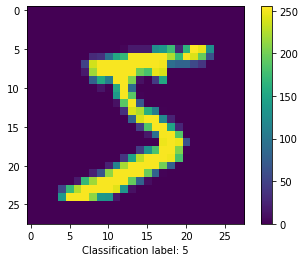

In [63]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

Normalization

Each cell (pixel) can have value from 0 to 255 like it's presented above. Let's scale it to float value between 0 and 1:

In [64]:
images_train = images_train / 255.0
images_test = images_test / 255.0

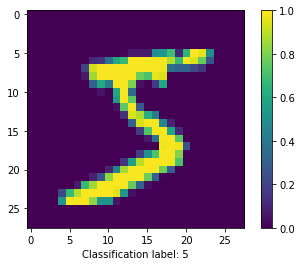

In [65]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

points to remember

It is worth mentioning that input images are inverted (white number on black background). MNIST data is prepared in a way where the smaller pixel's value is, the whiter it is (0 means 100% white, 255 means 100% black).

It's important because when you plug in model to an Android app, you will need to prepare input image in the same way (scale down and inverse colors).

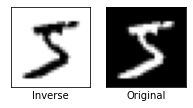

In [66]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 6, 1)
plt.xticks([])
plt.yticks([])
plt.xlabel("Inverse")
plt.imshow(images_train[0], cmap=plt.cm.binary)

plt.subplot(3, 6, 2)
plt.xticks([])
plt.yticks([])
plt.xlabel("Original")
plt.imshow(images_train[0], cmap=plt.cm.gray)

model training

In [67]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28,28), name="flat_1"),
  keras.layers.Dense(100, activation=tf.nn.relu, name="dense_1"),
  keras.layers.Dropout(0.2, name="dropout_1"),
  keras.layers.Dense(10, activation=tf.nn.softmax, name="dense_2")
])

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Display  Model Architecture

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flat_1 (Flatten)             (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [70]:
pip install pydot

In [71]:
pip install graphviz

model visualization libraries

In [72]:
import pydot
import graphviz

model visualization

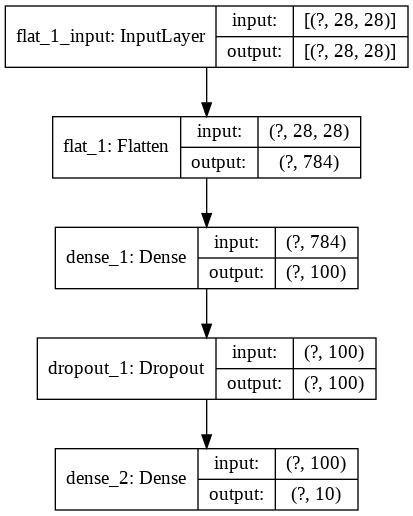

In [73]:
tf.keras.utils.plot_model(
    model, to_file='model.jpg', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

fitting the model

In [74]:
model.fit(images_train, labels_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3191 - accuracy: 0.9076
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1594 - accuracy: 0.9525
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9630
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9682
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9734
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.9760
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9773
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9795
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9812
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.053

model evaluation on test data

In [75]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9809
test accuracy: 0.98089998960495


model evaluation on random data

Let's take one image from the test set:

In [76]:
example_img = images_test[0]

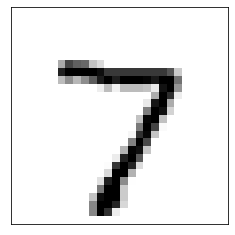

In [77]:
plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img, cmap=plt.cm.binary)

prediction

In [78]:
example_img_as_input = (np.expand_dims(example_img,0))
print("Image data shape:", example_img_as_input.shape)

Image data shape: (1, 28, 28)


In [79]:
img_prediction = model.predict(example_img_as_input)
print("Prediction results:", img_prediction)
print()
print("Predicted value:", np.argmax(img_prediction))

Prediction results: [[9.1603036e-09 2.8709346e-12 1.2907859e-07 6.2543200e-05 5.8719400e-16
  1.5736376e-08 1.3029691e-17 9.9993718e-01 5.2727454e-09 1.0197449e-07]]

Predicted value: 7


Visualise more predictions.

Plot the first X test images, their predicted label, and the true label.

Color correct predictions in blue, incorrect predictions in red.

In [80]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100 * np.max(predictions_array),
                                         true_label),
               color=color)

In [81]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

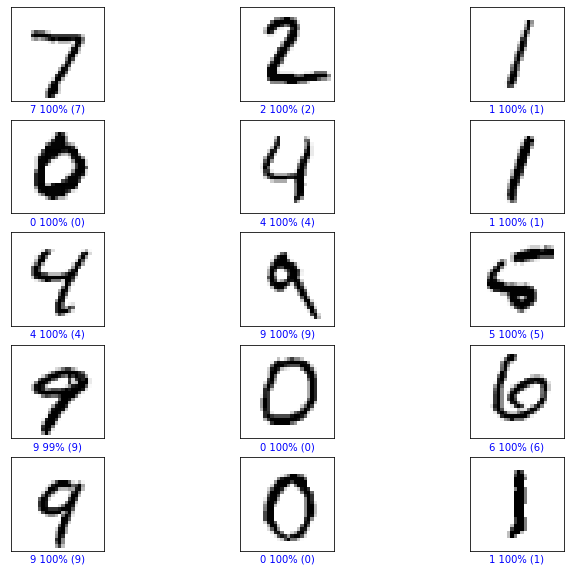

In [82]:
predictions = model.predict(images_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2  *2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels_test, images_test)
  # plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # plot_value_array(i, predictions, labels_test)

test accuracy

In [83]:
loss, acc = model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print()
print("Restored model, loss: {}".format(loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9809
Restored model, accuracy: 98.09%

Restored model, loss: 0.07338201999664307


save the model in portbuf format

In [84]:
saved_model_dir = 'mnist_model.TF'
model.save(saved_model_dir)

INFO:tensorflow:Assets written to: mnist_model.TF/assets


INFO:tensorflow:Assets written to: mnist_model.TF/assets


save the model in tflite format

In [85]:
tflite_model_file = "converted_model.tflite"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
open(tflite_model_file, "wb").write(tflite_model)

319924

model quantization

In [86]:
tflite_quantized_model_file = "converted_quantized_model.tflite"
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open(tflite_quantized_model_file, "wb").write(tflite_quantized_model)

84880

In [87]:
import os
model_no_quant_size = os.path.getsize(tflite_model_file)
print("Model is %d bytes" % model_no_quant_size)
print()
model_size = os.path.getsize(tflite_quantized_model_file)
print()
print("Quantized model is %d bytes" % model_size)
difference = model_no_quant_size - model_size
print()
print("Difference is %d bytes" % difference)

Model is 319924 bytes


Quantized model is 84880 bytes

Difference is 235044 bytes


More complex models have many more weights, meaning the space saving from quantization will be much higher, approaching 4x for most sophisticated models.

Regardless, our quantized model will take less time to execute than the original version, which is important on a tiny microcontroller!

In [88]:
!pip install -U tf2onnx

Requirement already up-to-date: tf2onnx in /usr/local/lib/python3.6/dist-packages (1.6.3)


conversion of tflite file to onnx file format

In [89]:
!python -m tf2onnx.convert --saved-model mnist_model.TF --opset 8 --output mnist_model.onnx

2020-08-09 06:12:43.738364: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-09 06:12:45,423 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2020-08-09 06:12:45.457596: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-09 06:12:45.462010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-09 06:12:45.463111: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-08-09 06:12:45.463169: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened 

In [90]:
import onnx
model = onnx.load_model('mnist_model.onnx')

with open("mnist_model.onnx.ir", 'w') as fp:
    fp.write(str(onnx.helper.printable_graph(model.graph)))

fp = open("mnist_model.onnx.txt", 'w')
for line in str(model):
    fp.write(line);
fp.close()

In [91]:
pip install onnx-tf

In [92]:
#onnx-tf -t -i mnist_model.onnx -o output_tf